# Regresión lineal

El enfoque más simple y conocido para modelar la relación entre dos o más variables de manera lineal sin duda es la **regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$


Las variables $\beta$ se les conoce como parámetros o coeficientes estimados. La idea detrás de la regresión lineal es encontrar los valores $\beta_0$ y $\beta_1$ de tal manera que el valor de $\beta_0 + \beta_1 \cdot x_i$ sea lo más cercano posible al valor correspondiente de $y_i$ para cada par de valores $(x_i,y_i)$.

El símbolo $\approx$ significa que vamos a hacer una *aproximación*. Esto quiere decir que la relación no es *completamente* perfecta y que podemos presentar cierto *error*. La ecuación real del modelo la podemos reescribir como:

$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1} \cdot x + \epsilon $$


El $\hat{}$ lo que significa es que estamos haciendo una **aproximación** de la variable $y$. $\epsilon_i$ lo que representa es que para cada valor $x_i$, vamos a tener una desviación o error leve.

El $\hat{}$ también lo escribimos sobre los parámetros porque son valores que *no conocemos*, por lo tanto, hay que estimarlos.

In [1]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

[Errno 2] No such file or directory: 'drive/MyDrive/SemanaTec/Repos/arte-analitica'
/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [5]:
# Vamos a cargar una tabla con datos sobre publicidad.
advertising = pd.read_csv('data/Advertising.csv', )
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# La primera columna indica el número de renglón. No la vamos a ocupar.
advertising = advertising.iloc[:, 1::]
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


La última columna de la tabla representa las ventas de un producto. Las otras tres columnas representan el presupuesto asignado de publicidad para tres medios diferentes: TV, radio y periódico.

Nuestro objetivo será contruir un modelo que prediga las ventas del producto dependiendo de cuánto presupuesto se gaste en cada medio.

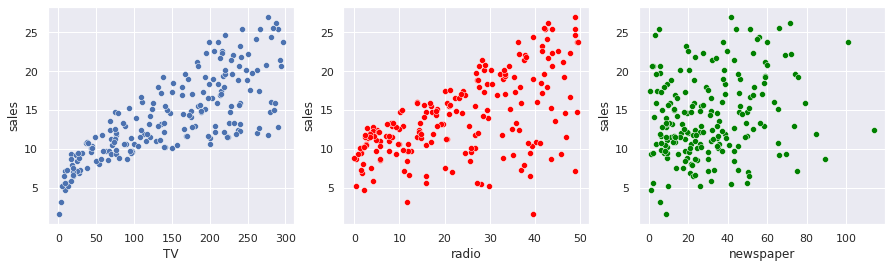

In [7]:
# Vamos a ver cómo se relaciona cada columna de presupuesto contra las ventas.
# Grafiquemos en una misma figura las tres relaciones.
fig, axs = plt.subplots(1, 3, figsize=(15,4))
# axs son nuestros espacios para graficar. Tenemos 3 espacios.

# Televisión
#axs[0] nos dice que vamos a graficar en el primer espacio.
sns.scatterplot(data=advertising, x='TV',y='sales', ax=axs[0])
# Radio
#axs[1] nos dice que vamos a graficar en el segundo espacio.
sns.scatterplot(data=advertising, x='radio',y='sales', ax=axs[1], color='red')
# Periódico
sns.scatterplot(data=advertising, x='newspaper',y='sales', ax=axs[2], color='green')

De las gráficas anteriores, podemos concluir lo siguiente:
* Entre más grande es el presupuesto de TV, las ventas son mayores.
* Entre más grande es el presupuesto gastado en radio, las ventas se incrementan aunque hay mayor variación. 
* La relación entre el presupuesto en periódicos y las ventas es difusa. 


Para crear el modelo, necesitamos encontral los parámetros $\beta$ de tal manera que **minimicen** el error que hay entre el valor real y el valor estimado. Esto lo podemos expresar en una ecuación:

$$ \min_{\beta_0, \beta_1} \sum_{i=1}^n (y_i - \hat{y_i})^2 = \min_{\beta_0, \beta_1} \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 \cdot x_i)^2$$

$n$ es el número de observaciones (renglones) de nuestros datos.

Esta ecuación lo que nos dice es que para cada punto, vamos a calcular la distancia entre el dato real y el dato generado por el modelo y queremos que la suma de esas distancias para todos los puntos sea lo **más pequeña** que sea posible.

Con un poco de cálculo diferencial, podemos llega a que los valores óptimos de los parámetros $\beta_0$ y $\beta_1$ son los siguientes:

$$ \hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})\cdot (y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \\
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\cdot \bar{x}$$

**Seaborn** tiene una función que calcula automáticamente la ecuación de la línea y la grafica. Sin embargo, no nos entrega los coeficientes.

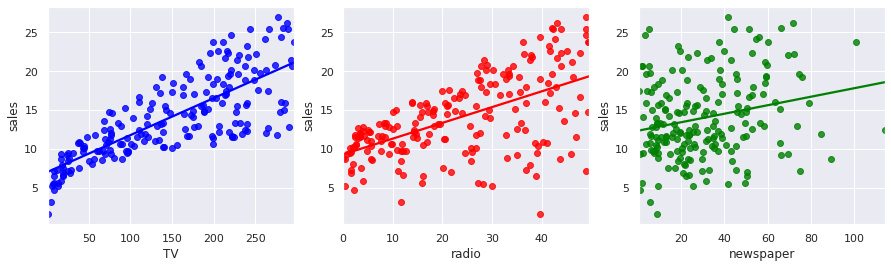

In [8]:
# Vamos a ver cómo quedaría un modelo lineal con cada tipo de presupuesto
fig, axs = plt.subplots(1, 3, figsize=(15,4))

# Televisión
sns.regplot(data=advertising, x='TV',y='sales', ax=axs[0], ci=None, color='blue')

# Radio
sns.regplot(data=advertising, x='radio',y='sales', ax=axs[1], color='red', ci=None)

# Periódico
sns.regplot(data=advertising, x='newspaper',y='sales', ax=axs[2], color='green', ci=None)

Para calcular los coeficientes, vamos a ocupar una librería especialidada en modelos de aprendizaje automático llamada **scikitlearn**.

```python
from sklearn.linear_model import LinearRegression
# Crear el modelo de regresión
model = LinearRegression()
# Calcular los valores del modelo
model.fit(X, y)
# Obtener los coeficientes
model.intercept_
model.coef_
# Usar el modelo para predecir
model.predict(X)
# Obtener una calificación de qué tan bueno es el modelo
# Va de 0 a 1. Entre más alto mejor.
model.score(X,y)
```

In [9]:
# La función para implementar una regresión lineal en Python
from sklearn.linear_model import LinearRegression

In [10]:
# Con esta función, podemos calcular los coeficientes para cada una de las variables

# Televisión
lm1 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm1.fit(advertising[['TV']], advertising['sales'])
print('TV')
print('beta_0: ', lm1.intercept_)
print('beta_1: ', lm1.coef_)
print('Score: ', lm1.score(advertising[['TV']], advertising['sales']), '\n')

# Radio
lm2 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm2.fit(advertising[['radio']], advertising['sales'])
print('Radio')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_)
print('Score: ', lm2.score(advertising[['radio']], advertising['sales']), '\n')


# Periódico
lm3 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm3.fit(advertising[['newspaper']], advertising['sales'])
print('Periódico')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(advertising[['newspaper']], advertising['sales']))


TV
beta_0:  7.032593549127695
beta_1:  [0.04753664]
Score:  0.611875050850071 

Radio
beta_0:  9.311638095158283
beta_1:  [0.20249578]
Score:  0.33203245544529525 

Periódico
beta_0:  12.35140706927816
beta_1:  [0.0546931]
Score:  0.05212044544430516


¿Cuál de los modelos es mejor de acuerdo al score?

## Ejemplo a detalle de la regresión lineal:

Vamos a tomar el caso del presupuesto de TV. El modelo lo que nos dice es que podemos *aproximar* cuánto vamos a tener en ventas dependiendo de cuál sea la inversión en publicidad de TV:

$$ \text{Ventas} \approx \hat{\beta}_0 + \hat{\beta}_1\cdot \text{Presupuesto TV}\\
\text{Ventas} \approx 7.032 + 0.047 \cdot \text{Presupuesto TV} $$


Vamos a nombrar $x$ al presupuesto de TV e $y$ a las ventas.

Vamos a comprobar que el Scikitlearn no regresa estos valores : 

$$ \hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})\cdot (y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \\
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\cdot \bar{x}$$


In [ ]:
# Vamos a verificar el modelo.
x = advertising['TV']
y = advertising['sales']
# Calcular los promedios
x_bar = np.mean(x)
y_bar = np.mean(y)
# Los coeficientes
beta_1 = np.sum((x-x_bar)*(y-y_bar))/np.sum((x-x_bar)**2)
beta_0 = y_bar - beta_1*x_bar

print('beta_0: {:.3f}'.format(beta_0))
print('beta_1: {:.3f}'.format(beta_1))

In [ ]:
# Ahora vamos a graficar manualmente el modelo y compararlo contra lo que nos da Sklearn y Seaborn.
fig, axs = plt.subplots(1, 3, figsize=(16,4))

#Primero graficamos el modelo manual
y_modelo = beta_0 + beta_1*x
sns.scatterplot(data=advertising, x='TV', y='sales', color='blue', ax=axs[0])
# Aquí como tenemos varias gráficas, vamos a cambiar por axs en vez de plt.
axs[0].plot(x, y_modelo, color='darkblue')
# Como estamos usando los axes, cambia un poco la función para el título
axs[0].set_title('Regresión lineal manual')

# Después graficamos el modelo de sklearn. Usaremos el método predict
y_modelo_sk = lm1.predict(advertising[['TV']])
sns.scatterplot(data=advertising, x='TV', y='sales', color='red', ax=axs[1])
# Aquí como tenemos varias gráficas, vamos a cambiar por axs en vez de plt.
axs[1].plot(x, y_modelo, color='darkred')
# Como estamos usando los axes, cambia un poco la función para el título
axs[1].set_title('Regresión lineal con SKlearn')


# Graficamos el método automático de Seaborn.
sns.regplot(data=advertising, x='TV', y='sales', color='green', ax=axs[2], ci=None)
axs[2].set_title('Regresión con Seaborn')
# Ajustamos el eje X para que sea más parecido a las primeras gráficas
axs[2].set_xlim([-10,310])

## Regresión lineal múltiple

En los ejemplos anteriores, obtuvimos los coeficientes para cada tipo de presupuesto **por separado**. El modelo con el mejor score es el primero (presupuesto de TV) con un valor de 0.61.

Lo que nos dice este número es que el modelo que generamos **explica el 61% de la variabilidad** que existe en nuestros datos. Entre más alto sea este porcentaje, mejor es el modelo. 

Una manera de mejorar el score (que se llama $R^2$) es utilizar **más de una variable a la vez**. A este método lo conocemos como *regresión lineal múltiple*. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

El proceso para generar un modelo es igual que en el caso de una varible:
```python
from sklearn.linear_model import LinearRegression
# Crear el modelo de regresión
model = LinearRegression()
# Calcular los valores del modelo
model.fit(X, y)
# Obtener los coeficientes
model.intercept_
model.coef_
# Usar el modelo para predecir
model.predict(X)
# Obtener una calificación de qué tan bueno es el modelo
# Va de 0 a 1. Entre más alto mejor.
model.score(X,y)
```

In [11]:
# Vamos a calcular el modelo con dos variables simultáneas
# Televisión  y radio
lm4 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm4.fit(advertising[['TV', 'radio']], advertising['sales'])
print('TV y radio')
print('beta_0: ', lm4.intercept_)
print('betas: ', lm4.coef_)
print('Score: ', lm4.score(advertising[['TV', 'radio']], advertising['sales']), '\n')

# Tv y periódico
lm5 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm5.fit(advertising[['TV','newspaper']], advertising['sales'])
print('TV y Periódico')
print('beta_0: ', lm5.intercept_)
print('betas: ', lm5.coef_)
print('Score: ', lm5.score(advertising[['TV','newspaper']], advertising['sales']), '\n')


# Periódico y radio
lm6 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm6.fit(advertising[['radio','newspaper']], advertising['sales'])
print('Radio y Periódico')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(advertising[['radio','newspaper']], advertising['sales']))


TV y radio
beta_0:  2.921099912405138
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956 

TV y Periódico
beta_0:  5.7749479679116344
betas:  [0.04690121 0.04421942]
Score:  0.6458354938293271 

Radio y Periódico
beta_0:  9.188920459196563
betas:  [0.19904459 0.00664417]
Score:  0.33270518395032256


Como podemo observar, los valores del score mejoraron. Además, en los coeficientes tenemos *2 valores*, porque ahora estamos considerando dos variables a la vez. Aquí es importante observar **el orden** en el que calculamos el modelo.

Por ejemplo, en el modelo 4 utilizamos primero la variable *TV* y después la variable *radio*. Entonces el modelo sería

$$ \text{Ventas} \approx 2.921 + 0.045\cdot \text{Presupuesto TV} + 0.188\cdot \text{Presupuesto radio}$$

Este modelo resultó ser el mejor de los tres, pues explica el **89%** de la variabilidad de los datos.

Algo que tenemos que tomar en cuenta es que cuando *agregamos más variables*, el score siempre aumenta. Si queremos saber si realmente la variable que estamos agregando tiene un *impacto real* en el modelo, tenemos que modificar el score. Esta nueva métrica (llamada $R^2$ ajustada) precisamente nos ayuda a comparar modelos cuando tenemos más de dos variables.

$$ R^2_{adj} = 1 - \left( \frac{(1-R^2)(n-1)}{n-k-1} \right)$$ 

In [12]:
# Vamos a definir una función para calcular esta métrica.
def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [13]:
# Vamos a comparar los modelos nuevamente con R2 ajustada
# Televisión  y radio
# La variable X la ponemos con doble corchete!
print('TV y radio')
print('beta_0: ', lm4.intercept_)
print('betas: ', lm4.coef_)
print('Score: ', lm4.score(advertising[['TV', 'radio']], advertising['sales']))
print('Score ajustado:', score_adj(advertising[['TV', 'radio']],
                                   advertising['sales'], lm4), '\n')

# Tv y periódico
print('TV y Periódico')
print('beta_0: ', lm5.intercept_)
print('betas: ', lm5.coef_)
print('Score: ', lm5.score(advertising[['TV','newspaper']], advertising['sales']))
print('Score ajustado:', score_adj(advertising[['TV', 'newspaper']],
                                   advertising['sales'], lm5), '\n')

# Periódico y radio
print('Radio y Periódico')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(advertising[['radio','newspaper']], advertising['sales']))
print('Score ajustado:', score_adj(advertising[['radio', 'newspaper']], 
                                   advertising['sales'], lm6), '\n')

## Ahora vamos a comparar el modelo con las tres variables
lm7 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm7.fit(advertising[['TV','radio','newspaper']], advertising['sales'])
print('TV, Radio y Periódico')
print('beta_0: ', lm7.intercept_)
print('betas: ', lm7.coef_)
print('Score: ', lm7.score(advertising[['TV','radio','newspaper']], advertising['sales']))
print('Score ajustado:', score_adj(advertising[['TV','radio', 'newspaper']], 
                                   advertising['sales'], lm7))

TV y radio
beta_0:  2.921099912405138
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956
Score ajustado: 0.8961505479974428 

TV y Periódico
beta_0:  5.7749479679116344
betas:  [0.04690121 0.04421942]
Score:  0.6458354938293271
Score ajustado: 0.6422399150864777 

Radio y Periódico
beta_0:  9.188920459196563
betas:  [0.19904459 0.00664417]
Score:  0.33270518395032256
Score ajustado: 0.3259306172899198 

TV, Radio y Periódico
beta_0:  2.938889369459412
betas:  [ 0.04576465  0.18853002 -0.00103749]
Score:  0.8972106381789521
Score ajustado: 0.8956373316204667


In [14]:
# Vamos a concentrarnos en los dos mejores modelos: Tv y Radio | las tres variables

# Televisión  y radio
print('TV y radio')
print('Score: {:.5f}'.format(lm4.score(advertising[['TV', 'radio']], advertising['sales'])))
print('Score ajustado: {:.5f}'.format(score_adj(advertising[['TV', 'radio']],
                                   advertising['sales'], lm4)), '\n')

# Tres variables
print('TV, Radio y Periódico')
print('Score: {:.5f}'.format(lm7.score(advertising[['TV','radio','newspaper']], 
                                       advertising['sales'])))
print('Score ajustado: {:.5f}'.format(score_adj(advertising[['TV','radio', 'newspaper']], 
                                   advertising['sales'], lm7)))


TV y radio
Score: 0.89719
Score ajustado: 0.89615 

TV, Radio y Periódico
Score: 0.89721
Score ajustado: 0.89564


El score simple es más alto en el modelo de tres variables, pero el score ajustado es más grande en el caso de TV y Radio. ¿Cuál modelo es el que nos conviene elegir?